In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
festivales_bcn_22 = pd.read_pickle("./data/festivales_bcn_22_procesado.pkl")

In [37]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "Mes",
    "Estacion"
]

In [38]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion'
]

In [39]:
columnas_numericas_fests = [
    "Edicio",
    "Assistents_a_Barcelona",
    "Assistents_fora_de_Barcelona",
    "total_asist"
]

Funciones análisis

In [40]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [41]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [42]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [43]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [44]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [45]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [46]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [47]:
festivales_bcn_22.describe().loc["mean"]

Edicio                              21.666667
Assistents_a_Barcelona          182392.000000
Assistents_fora_de_Barcelona     16666.666667
total_asist                     199058.666667
Name: mean, dtype: float64

In [48]:
festivales_bcn_22.describe().loc["50%"]

Edicio                              13.0
Assistents_a_Barcelona          122000.0
Assistents_fora_de_Barcelona         0.0
total_asist                     122000.0
Name: 50%, dtype: float64

In [49]:
festivales_bcn_22.describe().loc["max"]

Edicio                              54.0
Assistents_a_Barcelona          460500.0
Assistents_fora_de_Barcelona    150000.0
total_asist                     460500.0
Name: max, dtype: float64

In [50]:
festivales_bcn_22.describe().loc["min"]

Edicio                              3.0
Assistents_a_Barcelona          80000.0
Assistents_fora_de_Barcelona        0.0
total_asist                     80000.0
Name: min, dtype: float64

In [51]:
festivales_bcn_22[categoricas_festivales].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Otoño


Comentarios <br>
La mediana, situada en 13, parece ser más representativa a la hora de ver la cantidad de ediciones que llevan a cuestas los festivales más representativos que han tenido lugar en los últimos 5 años en Barcelona, ya que hay valores bastante alejados de la media, como uno de ellos que lleva 54 ediciones a cuestas, lo que resulta en una media algo distorcionada. <br>
Lo mismo sucede con la cantidad de asistentes, ya que hay casos que van desde los 8mil hasta el casi medio millón, pero el valor más representativo está en torno a los 120 mil.

Frecuencias relativa y absoluta

In [52]:
for catego in categoricas_destacadas:
    print(festivales_bcn_22[catego].value_counts())
    print("\n")

Ambit
Música                         5
Multidisciplinaris i altres    2
Arts escèniques                2
Name: count, dtype: int64


Titularidad
Privada    5
Pública    4
Name: count, dtype: int64


Mes
Junio         3
Diciembre     1
Marzo         1
Febrero       1
Septiembre    1
Julio         1
Octubre       1
Name: count, dtype: int64


Estacion
Otoño        3
Invierno     2
Primavera    2
Verano       2
Name: count, dtype: int64




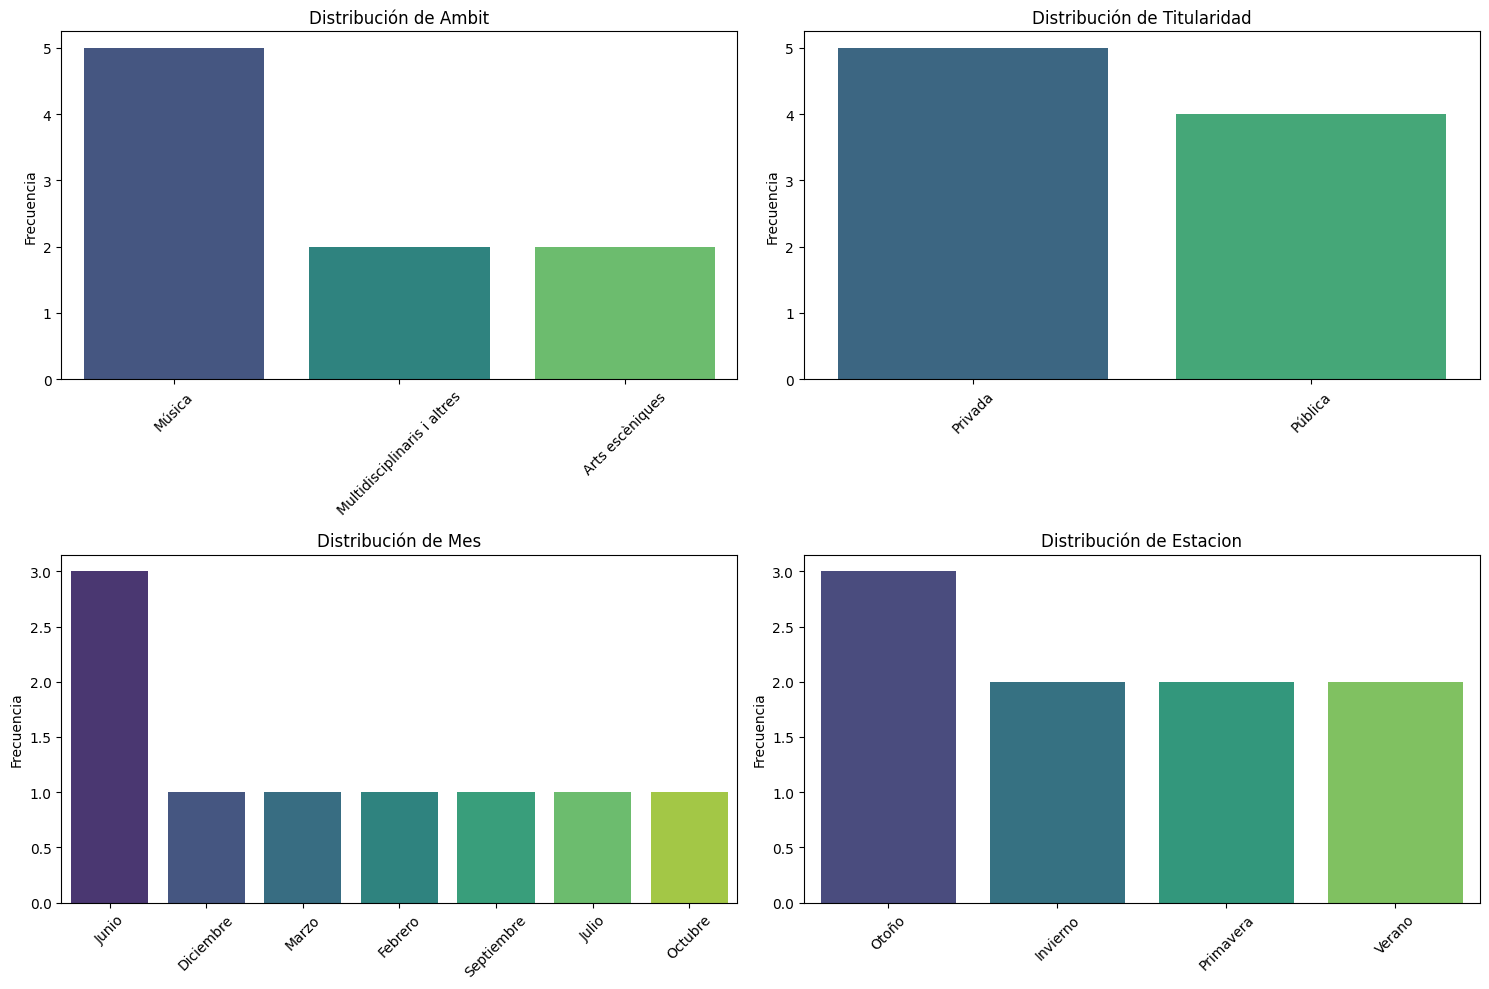

In [53]:
pinta_distribucion_categoricas(festivales_bcn_22, categoricas_destacadas)

Comentarios <br>
Junio parece ser el mes que concentra mayor cantidad de grandes festivales ya establecidos, si bien, a pesar de ello y si miramos según estaciones, es en otoño cuando mñas propuestas de este tipo hay. Cabe destacar, igualmente, que fuera de estos picos hay una distribucion equitativa enntre las otras temporadas. <br>
También es relevante observar que escénicas tiene menos representación en total, frente a las porpuestas musicales o multidisciplinares (que en ciertos casos incluyen tanto música como escénicas). <br>
Y que hay una predominancia de las poropuestas de titularidad pública, aunque seguidas muy de cerca de las privadas.

In [54]:
for catego in categoricas_destacadas:
    print(festivales_bcn_22[catego].value_counts()/len(festivales_bcn_22)*100)
    print("\n")

Ambit
Música                         55.555556
Multidisciplinaris i altres    22.222222
Arts escèniques                22.222222
Name: count, dtype: float64


Titularidad
Privada    55.555556
Pública    44.444444
Name: count, dtype: float64


Mes
Junio         33.333333
Diciembre     11.111111
Marzo         11.111111
Febrero       11.111111
Septiembre    11.111111
Julio         11.111111
Octubre       11.111111
Name: count, dtype: float64


Estacion
Otoño        33.333333
Invierno     22.222222
Primavera    22.222222
Verano       22.222222
Name: count, dtype: float64




Comentarios:<br>
Si en lugar de atender a las frecuencias absolutas miramos las relativas, las conclusiones son las mismas. No hace falta volver a graficar.

Medidas de posición

In [55]:
festivales_bcn_22.describe()

,Edicio,Assistents_a_Barcelona,Assistents_fora_de_Barcelona,total_asist
count,9.000000,9.000000,9.000000,9.000000
mean,21.666667,182392.000000,16666.666667,199058.666667
std,17.776389,125596.050134,50000.000000,137603.298686
min,3.000000,80000.000000,0.000000,80000.000000
25%,10.000000,100000.000000,0.000000,100000.000000
50%,13.000000,122000.000000,0.000000,122000.000000
75%,29.000000,200000.000000,0.000000,300000.000000
max,54.000000,460500.000000,150000.000000,460500.000000


In [56]:
get_IQR(festivales_bcn_22,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

19.0

In [57]:
print(festivales_bcn_22["Edicio"].quantile(0.5), "\n",
    festivales_bcn_22["Edicio"].quantile(0.9), "\n",
    festivales_bcn_22["Edicio"].quantile(0.95), "\n",
    festivales_bcn_22["Edicio"].max())

13.0 
 47.6 
 50.8 
 54.0


Comentarios: <br>
Es notable la dispersión de valores cuando miramos el rango intercuartílico en lo referente al número de ediciones, ya que la mediana está en las 13 ediciones, el 90% está por debajo de las 48, y el último 10% concentra picos de más de 50.

In [58]:
get_IQR(festivales_bcn_22,"total_asist") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

200000.0

In [59]:
print(festivales_bcn_22["total_asist"].quantile(0.5), "\n",
    festivales_bcn_22["total_asist"].quantile(0.9), "\n",
    festivales_bcn_22["total_asist"].quantile(0.95), "\n",
    festivales_bcn_22["total_asist"].max())

122000.0 
 372100.0 
 416299.99999999994 
 460500.0


Comentarios: <br>
Mucho más agudo aún es el pico de número de asistentes, en el que la mediana está en 122.000, el primero 90% en 370mil, que ya es 3 veces más, pero el último segmento pega un salto abrupto superando los 450 mil.

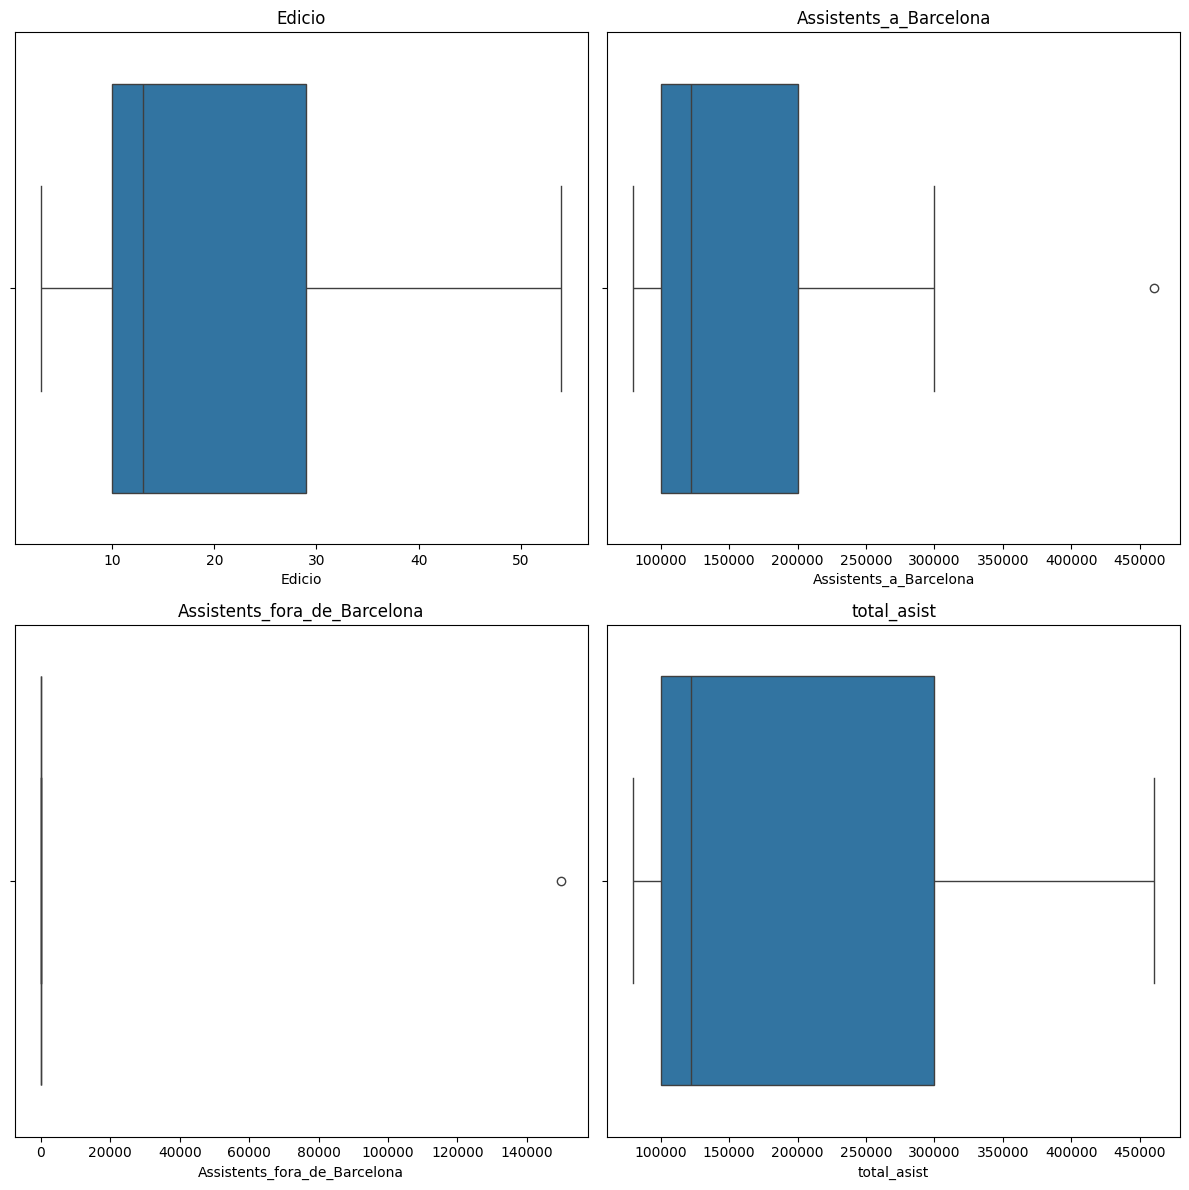

In [60]:
plot_multiple_boxplots(festivales_bcn_22, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, ni en ediciones ni en asistentes, aunque la mayoría de los casos está dentro del rango. Y se ve claramente un outlier, que em el caso de los asistentes, que es el que tiene el casi medio millón de asistentes.

In [61]:
plot_boxplot_grouped(festivales_bcn_22, "Edicio", "total_asist")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [62]:
festivales_bcn_22.describe().loc[["std", "mean"]].T

,std,mean
Edicio,17.776389,21.666667
Assistents_a_Barcelona,125596.050134,182392.000000
Assistents_fora_de_Barcelona,50000.000000,16666.666667
total_asist,137603.298686,199058.666667


In [63]:
variabilidad(festivales_bcn_22)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,17.776389,21.666667,0.820449
Assistents_a_Barcelona,125596.050134,182392.000000,0.688605
Assistents_fora_de_Barcelona,50000.000000,16666.666667,3.000000
total_asist,137603.298686,199058.666667,0.691270


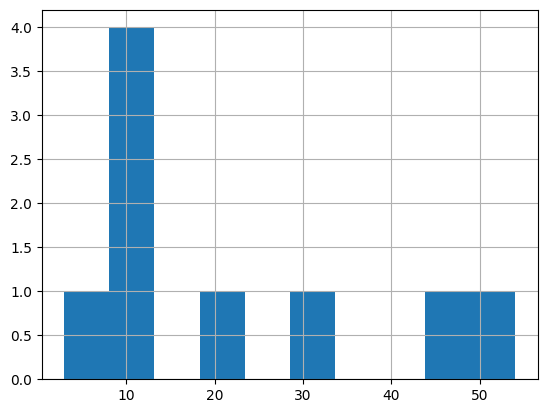

In [64]:
festivales_bcn_22["Edicio"].hist();

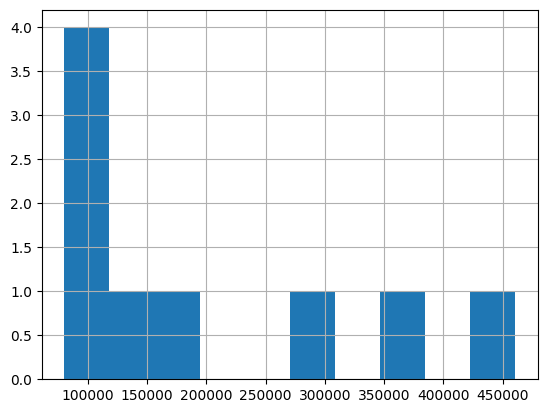

In [65]:
festivales_bcn_22["total_asist"].hist();

Comentarios: <br>
Hay bastabte dispersión de valores, tanto de asistentes como de número de ediciones.

Distribución

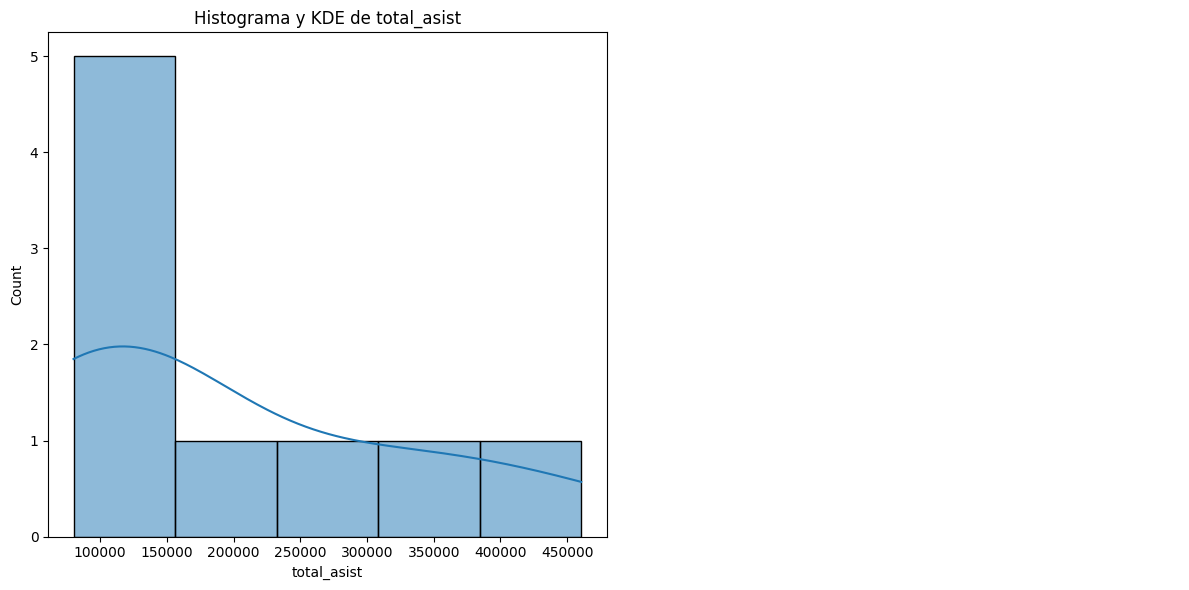

In [66]:
plot_histo_den(festivales_bcn_22, ["total_asist"])

Anomalías outliers

(2,)


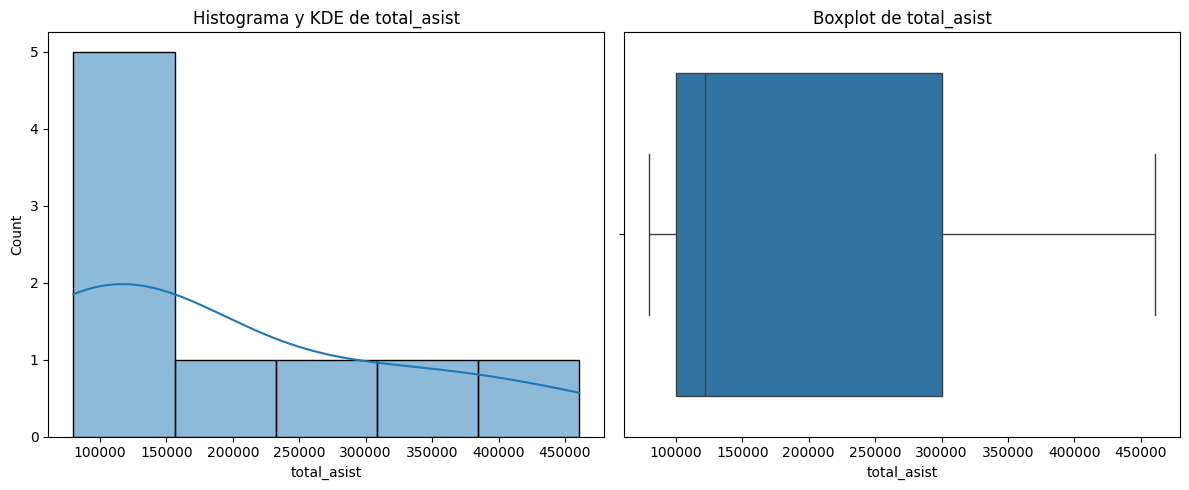

In [67]:
plot_combined_graphs(festivales_bcn_22, ["total_asist"])

In [68]:
festivales_bcn_22

,Ambit,Edicio,NomDelFestival,Assistents_a_Barcelona,Assistents_fora_de_Barcelona,Titularidad,Mes,Estacion,total_asist
1,Multidisciplinaris i altres,3.0,Barcelona Festival de Nadal,300000.0,0.0,Pública,Diciembre,Otoño,300000.0
2,Música,9.0,Brunch-in the City,200000.0,150000.0,Privada,Marzo,Invierno,350000.0
3,Música,10.0,Festival Jardins de Pedralbes,90000.0,0.0,Privada,Junio,Primavera,90000.0
4,Arts escèniques,46.0,Grec Festival de Barcelona,109991.0,0.0,Pública,Junio,Verano,109991.0
5,Multidisciplinaris i altres,11.0,Llum BCN,100000.0,0.0,Pública,Febrero,Invierno,100000.0
6,Arts escèniques,13.0,Mercè Arts de Carrer. MAC,179037.0,0.0,Pública,Septiembre,Otoño,179037.0
7,Música,20.0,Primavera Sound,460500.0,0.0,Privada,Julio,Verano,460500.0
8,Música,29.0,Sónar. Festival Internacional de Música Avança...,122000.0,0.0,Privada,Junio,Primavera,122000.0
9,Música,54.0,Voll-Damm Festival de Jazz de Barcelona,80000.0,0.0,Privada,Octubre,Otoño,80000.0
